<a href="https://colab.research.google.com/github/profliuhao/CSIT598/blob/main/CSIT598_K_nearest_neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training Accuracy: 0.9416666666666667

Classification Report - Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.90      0.93      0.92        41
           2       0.92      0.90      0.91        39

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

Test Accuracy: 1.0

Classification Report - Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



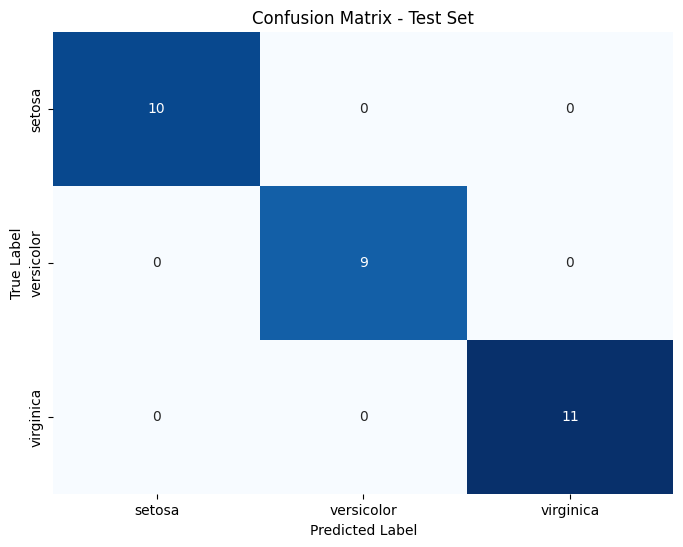

In [3]:
# Training the KNN model
knn_clf = KNeighborsClassifier(n_neighbors=3)  # You can change n_neighbors to experiment
knn_clf.fit(X_train, y_train)

# Evaluating the model on the training set
y_train_pred = knn_clf.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report - Training Set:\n", classification_report(y_train, y_train_pred))

# Evaluating the model on the test set
y_test_pred = knn_clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report - Test Set:\n", classification_report(y_test, y_test_pred))

# Plotting a confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
